<center><h1 style="color:#00008B">  Capstone 2 - Employee attrition prediction 📈📊 </h1>

A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

* The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
* A sizeable department has to be maintained, for the purposes of recruiting new talent
* More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company

Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

### <span style="color: Brown;"> Problem statement:
<span style="color: red;"> Which attributes are the most significant predictors of employee attrition and what must be done to decrease the estimated number of employees leaving next year by 15%?

In [36]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleansing

In [37]:
# Reading General_data.csv
original_df=pd.read_csv("HR - general_data.csv")
original_df.head()

,EmployeeID,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,2,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,3,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,4,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,5,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [38]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4391 non-null   float64
 14  Over18                  

In [39]:
original_df.isna().sum()

EmployeeID                  0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [40]:
##Substituting the NA for the "NumCompaniesWorked" column, assuming they have only worked at the current company

original_df.fillna(1, inplace=True)
original_df.isna().sum()

EmployeeID                 0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [41]:
join_df=pd.read_csv("employee_survey_data.csv")
join_df.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [42]:
join_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [43]:
join_df.isna().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [44]:
# Substituting the NA for the "EnviromentSatisfaction", "JobSatisfaction", "WorkLifeBalance" columns,by taking the mean 

join_df.fillna(join_df.mean().round(0), inplace=True)
join_df.isna().sum()

EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

In [45]:
##Inner Joined the two datsets, i.e. "HR- General Data" and "Employee survey data"

raw_df=original_df.merge(join_df, on="EmployeeID")
raw_df.head()

,EmployeeID,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,8,0,1.0,6,1,0,0,3.0,4.0,2.0
1,2,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,...,8,1,6.0,3,5,1,4,3.0,2.0,4.0
2,3,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,...,8,3,5.0,2,5,0,3,2.0,2.0,1.0
3,4,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,...,8,3,13.0,5,8,7,5,4.0,4.0,3.0
4,5,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,...,8,2,9.0,2,6,0,4,4.0,1.0,3.0


In [46]:
# Replace the numerical values of the Education column with its corresponding categorical label

raw_df['Education'].replace(1, 'Below College', inplace=True)
raw_df['Education'].replace(2, 'College', inplace=True)
raw_df['Education'].replace(3, 'Bachelor', inplace=True)
raw_df['Education'].replace(4, 'Master', inplace=True)
raw_df['Education'].replace(5, 'Doctor', inplace=True)

# Replace the numerical values of the EnvironmentSatisfaction column with its corresponding categorical label

raw_df['EnvironmentSatisfaction'].replace(1, 'Low', inplace=True)
raw_df['EnvironmentSatisfaction'].replace(2, 'Medium', inplace=True)
raw_df['EnvironmentSatisfaction'].replace(3, 'High', inplace=True)
raw_df['EnvironmentSatisfaction'].replace(4, 'Very High', inplace=True)

# Replace the numerical values of the JobSatisfaction column with its corresponding categorical label

raw_df['JobSatisfaction'].replace(1, 'Low', inplace=True)
raw_df['JobSatisfaction'].replace(2, 'Medium', inplace=True)
raw_df['JobSatisfaction'].replace(3, 'High', inplace=True)
raw_df['JobSatisfaction'].replace(4, 'Very High', inplace=True)


# Replace the numerical values of the WorkLifeBalance column with its corresponding categorical label

raw_df['WorkLifeBalance'].replace(1, 'Bad', inplace=True)
raw_df['WorkLifeBalance'].replace(2, 'Good', inplace=True)
raw_df['WorkLifeBalance'].replace(3, 'Better', inplace=True)
raw_df['WorkLifeBalance'].replace(4, 'Best', inplace=True)

raw_df.head()

,EmployeeID,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,No,Travel_Rarely,Sales,6,College,Life Sciences,1,Female,1,...,8,0,1.0,6,1,0,0,High,Very High,Good
1,2,Yes,Travel_Frequently,Research & Development,10,Below College,Life Sciences,1,Female,1,...,8,1,6.0,3,5,1,4,High,Medium,Best
2,3,No,Travel_Frequently,Research & Development,17,Master,Other,1,Male,4,...,8,3,5.0,2,5,0,3,Medium,Medium,Bad
3,4,No,Non-Travel,Research & Development,2,Doctor,Life Sciences,1,Male,3,...,8,3,13.0,5,8,7,5,Very High,Very High,Better
4,5,No,Travel_Rarely,Research & Development,10,Below College,Medical,1,Male,1,...,8,2,9.0,2,6,0,4,Very High,Low,Better


In [47]:
# Dropped the "standardHours", "EmployeeCount" and the "Over18" columns since they have no relevance for our analysis

raw_df.drop(columns=["StandardHours", "EmployeeCount", "Over18"], inplace=True, errors = 'ignore')
raw_df.head()

,EmployeeID,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,No,Travel_Rarely,Sales,6,College,Life Sciences,Female,1,Healthcare Representative,...,11,0,1.0,6,1,0,0,High,Very High,Good
1,2,Yes,Travel_Frequently,Research & Development,10,Below College,Life Sciences,Female,1,Research Scientist,...,23,1,6.0,3,5,1,4,High,Medium,Best
2,3,No,Travel_Frequently,Research & Development,17,Master,Other,Male,4,Sales Executive,...,15,3,5.0,2,5,0,3,Medium,Medium,Bad
3,4,No,Non-Travel,Research & Development,2,Doctor,Life Sciences,Male,3,Human Resources,...,11,3,13.0,5,8,7,5,Very High,Very High,Better
4,5,No,Travel_Rarely,Research & Development,10,Below College,Medical,Male,1,Sales Executive,...,12,2,9.0,2,6,0,4,Very High,Low,Better


# Insights

## Since we have a clean ready table to start our analysis with, we can proceed and ask effective questions that will help us answer various questions.

### 🚩 How many employees have & have not  attrited in the last year?

In [48]:
# In general how many employees have & haven`t` attrited in the last year?
raw_df["Attrition"].isin(["Yes"]).value_counts()

Attrition
False    3699
True      711
Name: count, dtype: int64

In [49]:
# Proportions of employees that have & haven`t` attrited in the last year?
proportion = raw_df["Attrition"].isin(["Yes"]).value_counts(normalize=True)
proportion

Attrition
False    0.838776
True     0.161224
Name: proportion, dtype: float64

<Axes: title={'center': 'Attrition proportion'}, ylabel='proportion'>

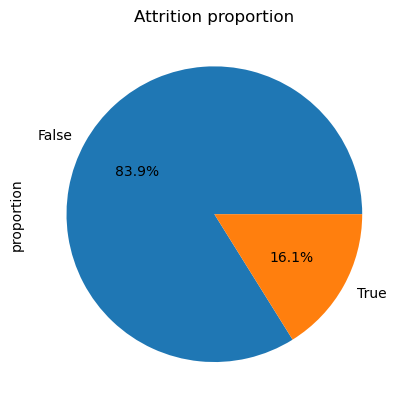

In [50]:
proportion.plot(kind='pie',y='Values',autopct='%1.1f%%', title= "Attrition proportion")

 ### 🚩How many employees have attrited from each department in the last year?

In [51]:
# Calculating the number of employees attrited from each department
dept = raw_df.groupby("Department")["Attrition"].value_counts().loc[:, "Yes"]
dept

Department
Human Resources            57
Research & Development    453
Sales                     201
Name: count, dtype: int64

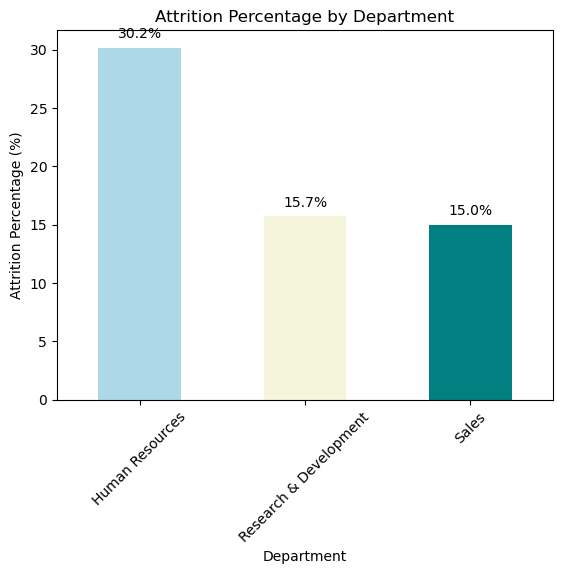

In [52]:
import pandas as pd  
import matplotlib.pyplot as plt  

# Assuming raw_df is your DataFrame  
# Calculate attrition count by department  
dept_attrition = raw_df.groupby("Department")["Attrition"].value_counts().loc[:, "Yes"]  

# Calculate the total number of employees in each department  
total_employees = raw_df['Department'].value_counts()  

# Calculate the percentage of attrition  
attrition_percentage = (dept_attrition / total_employees) * 100  

# Plotting the results  
ax = attrition_percentage.plot(kind='bar', color=['lightblue', 'beige', 'teal'])  
plt.title('Attrition Percentage by Department')  
plt.xlabel('Department')  
plt.ylabel('Attrition Percentage (%)')  
plt.xticks(rotation=45)

# Adding labels with % sign  
for p in ax.patches:  
    ax.annotate(f'{p.get_height():.1f}%',  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='bottom',  
                fontsize=10, color='black',  
                xytext=(0, 5),  
                textcoords='offset points')  

plt.show()

#### Since Research & Development department had the most employee atrition, let's further analyze it using job role. 

In [53]:
# Filter the dataframe to only include records of attrited employees who worked at the Research & Development department. 
rd_df = raw_df[(raw_df['Department'] == 'Research & Development') & (raw_df['Attrition'] == 'Yes')]

# Grouping by both department & Job role and counting how many employees have attrited from each role
jbb_df = rd_df.groupby(["Department", "JobRole"])['JobRole'].value_counts()

#Calculating the total count
total_count = jbb_df.sum()

#Renaming the count column to 'count'
jbb_df = jbb_df.reset_index(name='Count')

#Calculating the percent of total for the number of employees attrited
jbb_df['Percentage of Total'] = (jbb_df['Count'] / total_count) * 100  


jbb_df

,Department,JobRole,Count,Percentage of Total
0,Research & Development,Healthcare Representative,21,4.635762
1,Research & Development,Human Resources,18,3.973510
2,Research & Development,Laboratory Technician,72,15.894040
3,Research & Development,Manager,24,5.298013
4,Research & Development,Manufacturing Director,36,7.947020
5,Research & Development,Research Director,42,9.271523
6,Research & Development,Research Scientist,99,21.854305
7,Research & Development,Sales Executive,111,24.503311
8,Research & Development,Sales Representative,30,6.622517


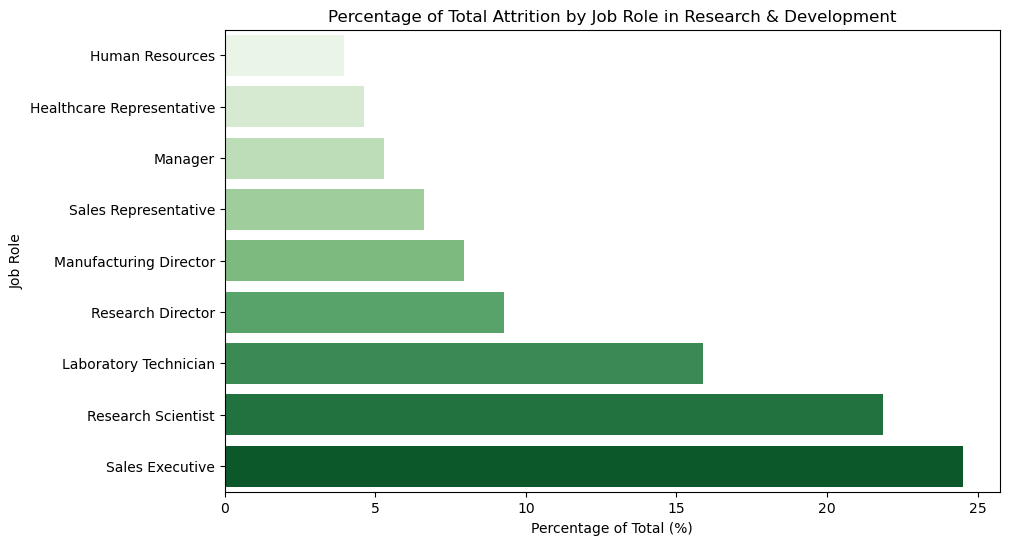

In [54]:
# Assuming jbb_df_sorted is already defined and contains the appropriate data  
jbb_df_sorted = jbb_df.sort_values(by='Percentage of Total', ascending=True)  
plt.figure(figsize=(10, 6))  
bar_plot = sns.barplot(data=jbb_df_sorted, x='Percentage of Total', y='JobRole', palette='Greens')  
plt.title('Percentage of Total Attrition by Job Role in Research & Development')  
plt.xlabel('Percentage of Total (%)')  
plt.ylabel('Job Role')  

plt.show()

#### Segment 1

* Our first segment would be Employees that are Sales executive and Research Director working in the Research and Development department.

### 🚩 We are now creating a bucket based on Monthly Income to help us see if larger number of employees are attriting from a certain income bucket

In [55]:
# Filter the DataFrame for Attrition == 'Yes'  
Att_df = raw_df[raw_df['Attrition'] == 'Yes']  

# Create the buckets based on MonthlyIncome  
Att_df["buckets"] = pd.cut(Att_df["MonthlyIncome"], bins=[0, 40000, 80000, 120000, 160000, 200000], labels=['Below 40K', '40K-80K', '80K-120K', '120K-160K', 'Above 160K'])  

# Count the occurrences of each bucket and reset the index  
bucket_counts = Att_df["buckets"].value_counts().reset_index(name='count')  

# Calculate the percentage of total for each bucket  
bucket_counts['percentage'] = (bucket_counts['count'] / bucket_counts['count'].sum()) * 100  

# Rename the columns for clarity  
bucket_counts.columns = ['Bucket', 'Count', 'Percentage']  
  
bucket_counts

C:\Users\dagem\AppData\Local\Temp\ipykernel_16224\3057393158.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Att_df["buckets"] = pd.cut(Att_df["MonthlyIncome"], bins=[0, 40000, 80000, 120000, 160000, 200000], labels=['Below 40K', '40K-80K', '80K-120K', '120K-160K', 'Above 160K'])


,Bucket,Count,Percentage
0,40K-80K,285,40.084388
1,Below 40K,270,37.974684
2,80K-120K,75,10.548523
3,Above 160K,51,7.172996
4,120K-160K,30,4.219409


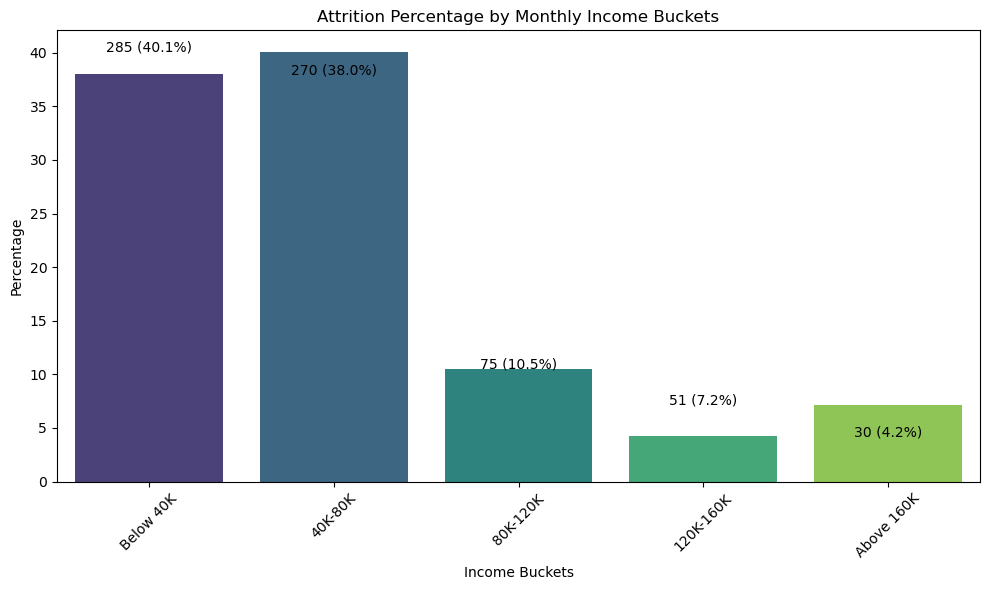

In [56]:
# Create the bar plot  
plt.figure(figsize=(10, 6))  
bar_plot = sns.barplot(data=bucket_counts, x='Bucket', y='Percentage', palette='viridis')  

# Add percentage labels on top of the bars  
for index, row in bucket_counts.iterrows():  
    bar_plot.text(row.name, row.Percentage, f'{row.Count} ({row.Percentage:.1f}%)', color='black', ha="center")  

# Set titles and labels  
plt.title('Attrition Percentage by Monthly Income Buckets')  
plt.xlabel('Income Buckets')  
plt.ylabel('Percentage')  
plt.xticks(rotation=45)  
plt.tight_layout()  

# Show the plot  
plt.show()

#### Segment 2

* The second segment would be Employees with monthly income less than $80,000, since they have a much higher attrition rate. 

### 🚩 How did employee business travel frequency impact the attrition rate in the company in the previous year?

In [57]:
count_df = Att_df['BusinessTravel'].value_counts().reset_index(name='count')  
total_count = count_df['count'].sum()  
count_df['percentage'] = (count_df['count'] / total_count) * 100  
count_df

,BusinessTravel,count,percentage
0,Travel_Rarely,468,65.822785
1,Travel_Frequently,207,29.113924
2,Non-Travel,36,5.063291


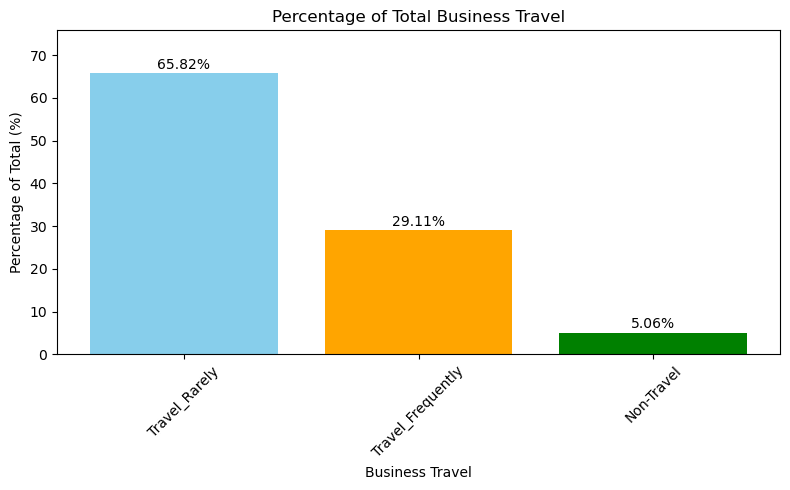

In [58]:
# Assuming count_df is your DataFrame  
plt.figure(figsize=(8, 5))  

# Bar plot  
plt.bar(count_df['BusinessTravel'], count_df['percentage'], color=['skyblue','orange','green'])  

# Adding labels and title  
plt.xlabel('Business Travel')  
plt.ylabel('Percentage of Total (%)')  
plt.title('Percentage of Total Business Travel')  

# Adding percentage labels on top of bars  
for index, value in enumerate(count_df['percentage']):  
    plt.text(index, value + 1, f'{value:.2f}%', ha='center')  

# Show plot  
plt.xticks(rotation=45)  
plt.ylim(0, max(count_df['percentage']) + 10)  # Adjust y-axis limit for better visibility  
plt.tight_layout()  
plt.show()

#### Segment 3
* The third segment consists of employees who rarely  travel for business and have left the company in the past year.

### 🚩 How did employee commutes affect the attrition rate?

In [59]:
# Create the buckets based on distance traveled to home  
Att_df["distance_range"] = pd.cut(Att_df["DistanceFromHome"], bins=[0, 6, 12, 18, 24, 30], labels=['Below 6Km', '6km - 12km', '12km - 18km', '18km - 24km', 'Above 24km'])

# Count the occurrences of each bucket and reset the index
trv_counts = Att_df["distance_range"].value_counts().reset_index(name='count') 

# Calculate the percentage of total for each bucket
trv_counts['percentage'] = (trv_counts['count'] / trv_counts['count'].sum()) * 100

# Rename the columns for clarity  
trv_counts.columns = ['distance range', 'Count', 'Percentage']

trv_counts

C:\Users\dagem\AppData\Local\Temp\ipykernel_16224\3636798761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Att_df["distance_range"] = pd.cut(Att_df["DistanceFromHome"], bins=[0, 6, 12, 18, 24, 30], labels=['Below 6Km', '6km - 12km', '12km - 18km', '18km - 24km', 'Above 24km'])


,distance range,Count,Percentage
0,Below 6Km,324,45.569620
1,6km - 12km,201,28.270042
2,12km - 18km,81,11.392405
3,18km - 24km,63,8.860759
4,Above 24km,42,5.907173


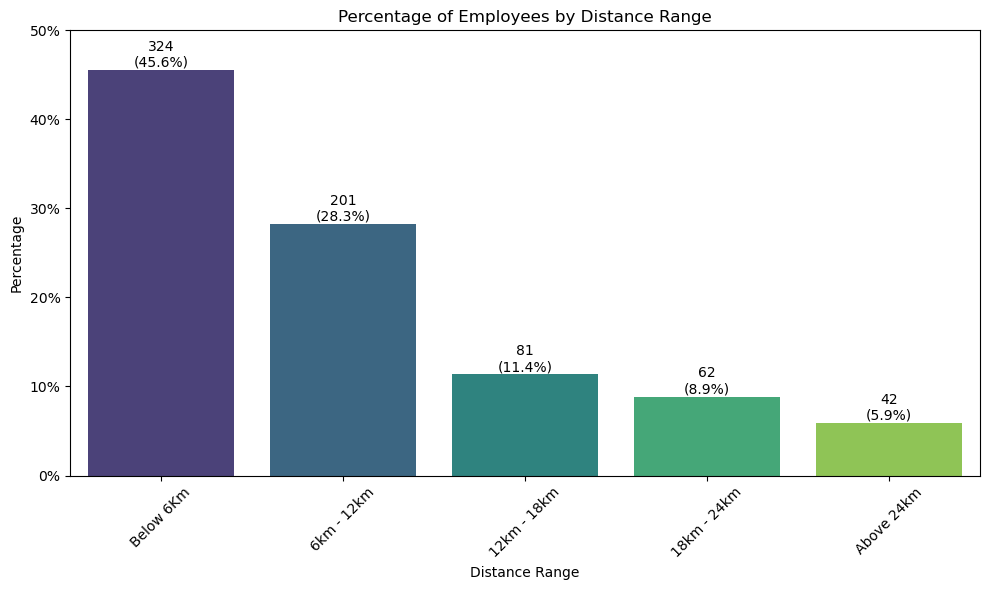

In [60]:
# Set up the figure and axis  
plt.figure(figsize=(10, 6))  

# Calculate percentages  
trv_counts['Percentage'] = (trv_counts['Count'] / total_count) * 100  

# Create a bar plot for Percentage  
ax = sns.barplot(x='distance range', y='Percentage', data=trv_counts, palette='viridis')  
plt.title('Percentage of Employees by Distance Range')  
plt.xlabel('Distance Range')  
plt.ylabel('Percentage')  
plt.xticks(rotation=45)  

# Add count and percentage labels  
for p in ax.patches:  
    count = int(p.get_height() * total_count / 100)  # Convert back to count for display  
    percentage = p.get_height()  # Already in percentage  
    ax.annotate(f'{count}\n({percentage:.1f}%)',   
                (p.get_x() + p.get_width() / 2., p.get_height()),   
                ha='center', va='bottom')  

# Set y-ticks to show percentage format  
ax.set_yticks(range(0, 51, 10))  # Adjust tick range as needed  
ax.set_yticklabels([f'{int(tick)}%' for tick in range(0, 51, 10)])  

plt.tight_layout()  
plt.show()

#### Segment 4
* The fourth segment is employees with daily commute less than 6 kilometers.

### 🚩 How did the correlation between years of service at the company and the percentage increase in salary influence the attrition rate?

In [61]:
# Create the buckets based on distance traveled to home  
Att_df["years_worked"] = pd.cut(Att_df["TotalWorkingYears"], bins=[0, 10, 20, 30, 40], labels=['Below 10 years', '10 - 20 years', '20 - 30 years', '30 - 40 years'])  

# Count the occurrences of each bucket and reset the index  
yrs_counts = Att_df["years_worked"].value_counts().reset_index(name='count')  

# Calculate the percentage of total for each bucket  
yrs_counts['percentage'] = (yrs_counts['count'] / yrs_counts['count'].sum()) * 100  

# Calculate the average salary hike for each category of years worked  
average_hikes = Att_df.groupby("years_worked")['PercentSalaryHike'].mean()  

# Merge the average hikes back to the counts DataFrame  
yrs_counts = yrs_counts.rename(columns={'index': 'Years Worked'})  
yrs_counts = yrs_counts.merge(average_hikes.reset_index(), on='years_worked', how='left')  

# Rename the columns for clarity  
yrs_counts.columns = ['Years Worked', 'No. employees attrited', '% attrited', '% salary hike']  

yrs_counts

C:\Users\dagem\AppData\Local\Temp\ipykernel_16224\2951752063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Att_df["years_worked"] = pd.cut(Att_df["TotalWorkingYears"], bins=[0, 10, 20, 30, 40], labels=['Below 10 years', '10 - 20 years', '20 - 30 years', '30 - 40 years'])


,Years Worked,No. employees attrited,% attrited,% salary hike
0,Below 10 years,531,76.293103,15.525424
1,10 - 20 years,117,16.810345,15.564103
2,20 - 30 years,33,4.741379,13.454545
3,30 - 40 years,15,2.155172,16.200000


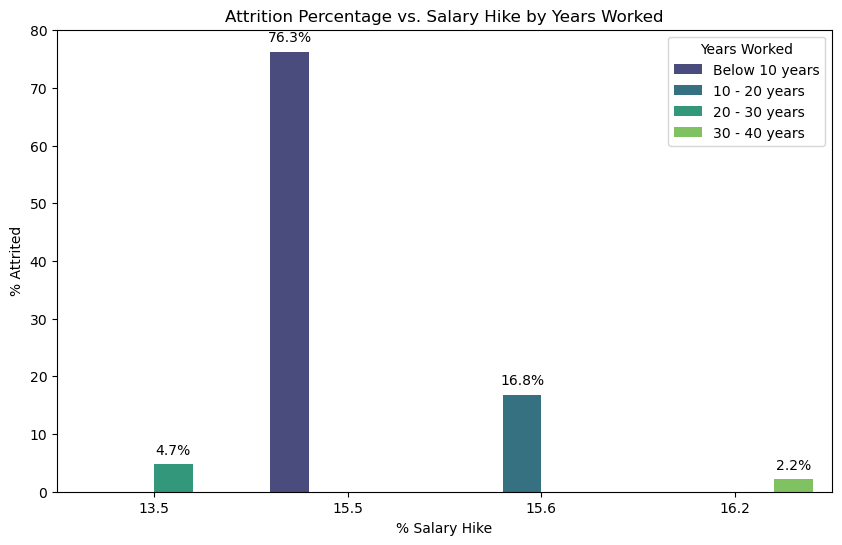

In [62]:
# Round the '% salary hike' column to 1 decimal point  
yrs_counts['% salary hike'] = yrs_counts['% salary hike'].round(1)  

# Sort the DataFrame by '% attrited' in descending order  
yrs_counts = yrs_counts.sort_values(by='% attrited', ascending=False)  

# Set the figure size  
plt.figure(figsize=(10, 6))  

# Create the bar chart  
barplot = sns.barplot(data=yrs_counts, x='% salary hike', y='% attrited', hue='Years Worked', palette='viridis')  

# Set the title and labels  
plt.title('Attrition Percentage vs. Salary Hike by Years Worked')  
plt.xlabel('% Salary Hike')  
plt.ylabel('% Attrited')  

# Show the legend  
plt.legend(title='Years Worked')  

# Round the x-axis ticks to 1 decimal point  
x_ticks = np.round(plt.xticks()[0], 1)  
plt.xticks(x_ticks)  

# Add labels to the bars with '%' sign  
for bar in barplot.patches:  
    barplot.annotate(f'{bar.get_height():.1f}%',   
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),   
                     ha='center', va='bottom',   
                     fontsize=10, color='black',   
                     xytext=(0, 5),  # Offset text by 5 points  
                     textcoords='offset points')  

# Show the plot  
plt.show()

#### Segment 5
* The Fifth segment would be employees that worked less than 10 years with the company

### 🚩Based on their survey result, how satisfied were attrited employees on their job and work environment?

In [63]:
# Counting the occurence of each Environment satisfcation level
Env = Att_df['EnvironmentSatisfaction'].value_counts().reset_index(name='Employees attrited (Env satisfaction)')

# Renaming the columns for clarity
Env.columns=['Satisfaction','Employees Attrited(Env satisfaction survey)']

Env

,Satisfaction,Employees Attrited(Env satisfaction survey)
0,Low,213
1,High,191
2,Very High,179
3,Medium,128


In [64]:
# Counting the occurence of each Job satisfcation level
Jb = Att_df['JobSatisfaction'].value_counts().reset_index(name='Employees attrited (Job satisfaction)')

# Renaming the columns for clarity
Jb.columns=['Satisfaction','Employees Attrited (Job satisfaction survey)']

Jb

,Satisfaction,Employees Attrited (Job satisfaction survey)
0,High,220
1,Low,197
2,Very High,156
3,Medium,138


In [74]:
# Merged the Environmental and Job satisfaction count tables sharing one satisfaction column
sts= Env.merge(Jb, on=['Satisfaction'])
sts

,Satisfaction,Employees Attrited(Env satisfaction survey),Employees Attrited (Job satisfaction survey)
0,Low,213,197
1,High,191,220
2,Very High,179,156
3,Medium,128,138


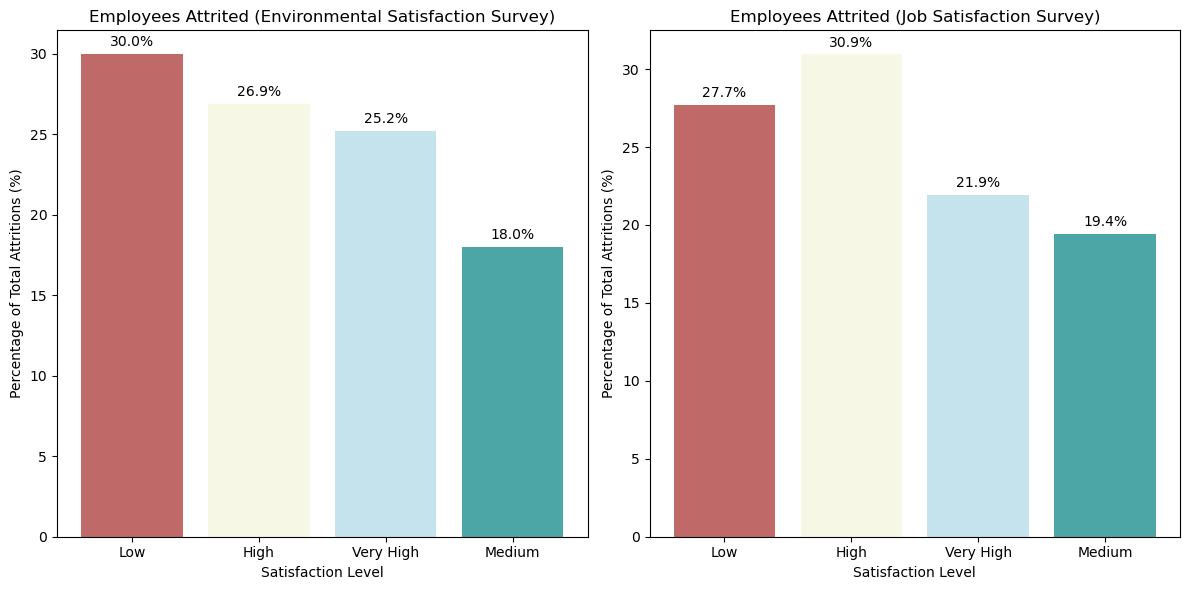

In [75]:
# Set 'Satisfaction' column as the index  
sts.set_index('Satisfaction', inplace=True)  

# Calculate the total attritions for each type  
total_env_attritions = sts['Employees Attrited(Env satisfaction survey)'].sum()  
total_job_attritions = sts['Employees Attrited (Job satisfaction survey)'].sum()  

# Calculate percentages for plotting  
env_percentages = (sts['Employees Attrited(Env satisfaction survey)'] / total_env_attritions) * 100  
job_percentages = (sts['Employees Attrited (Job satisfaction survey)'] / total_job_attritions) * 100  

# Set up the figure and axes for plotting  
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  

# Color mapping for satisfaction levels  
colors = ['Brown', 'beige', 'lightblue', 'teal']  # Example color coding  

# Bar chart for Environmental Satisfaction  
axes[0].bar(sts.index, env_percentages, color=colors, alpha=0.7)  
axes[0].set_title('Employees Attrited (Environmental Satisfaction Survey)')  
axes[0].set_xlabel('Satisfaction Level')  
axes[0].set_ylabel('Percentage of Total Attritions (%)')  

# Add percentage labels for the Environmental Satisfaction bars  
for i, percentage in enumerate(env_percentages):  
    axes[0].text(i, percentage + 0.5, f'{percentage:.1f}%', ha='center')  

# Bar chart for Job Satisfaction  
axes[1].bar(sts.index, job_percentages, color=colors, alpha=0.7)  
axes[1].set_title('Employees Attrited (Job Satisfaction Survey)')  
axes[1].set_xlabel('Satisfaction Level')  
axes[1].set_ylabel('Percentage of Total Attritions (%)')  

# Add percentage labels for the Job Satisfaction bars  
for i, percentage in enumerate(job_percentages):  
    axes[1].text(i, percentage + 0.5, f'{percentage:.1f}%', ha='center')  

# Show the plot  
plt.tight_layout()  
plt.show()

#### Segment 6
* The sixth segment are employees with low environmental satisfactions and high job satisfaction

In [67]:
#Overview of Just the raw_df 
raw_df

,EmployeeID,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,No,Travel_Rarely,Sales,6,College,Life Sciences,Female,1,Healthcare Representative,...,11,0,1.0,6,1,0,0,High,Very High,Good
1,2,Yes,Travel_Frequently,Research & Development,10,Below College,Life Sciences,Female,1,Research Scientist,...,23,1,6.0,3,5,1,4,High,Medium,Best
2,3,No,Travel_Frequently,Research & Development,17,Master,Other,Male,4,Sales Executive,...,15,3,5.0,2,5,0,3,Medium,Medium,Bad
3,4,No,Non-Travel,Research & Development,2,Doctor,Life Sciences,Male,3,Human Resources,...,11,3,13.0,5,8,7,5,Very High,Very High,Better
4,5,No,Travel_Rarely,Research & Development,10,Below College,Medical,Male,1,Sales Executive,...,12,2,9.0,2,6,0,4,Very High,Low,Better
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,No,Travel_Rarely,Research & Development,5,Master,Medical,Female,1,Research Scientist,...,17,1,10.0,5,3,0,2,Very High,Low,Better
4406,4407,No,Travel_Rarely,Research & Development,2,Master,Medical,Male,1,Laboratory Technician,...,15,0,10.0,2,3,0,2,Very High,Very High,Better
4407,4408,No,Travel_Rarely,Research & Development,25,College,Life Sciences,Male,2,Sales Executive,...,20,0,5.0,4,4,1,2,Low,High,Better
4408,4409,No,Travel_Rarely,Sales,18,College,Medical,Male,1,Laboratory Technician,...,14,1,10.0,2,9,7,8,Very High,Low,Better


In [68]:
# Export the raw_df as a csv for further analysis and visulaization on Tableau
raw_df.to_csv("raw_df.csv", index=False)